In [1]:
import numpy as np
import pandas as pd
import datetime
import csv
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

# import data

In [2]:
data_folder='s3://tf-trachack-data/212/'

upgrades=pd.read_csv(data_folder+"data/dev/upgrades.csv")

customer_info = pd.read_csv(data_folder+"data/dev/customer_info.csv" )

phone_info = pd.read_csv(data_folder+"data/dev/phone_info.csv" )

lrp_points=pd.read_csv(data_folder+"data/dev/lrp_points.csv")

network_usage_domestic=pd.read_csv(data_folder+"data/dev/network_usage_domestic.csv")

redemptions=pd.read_csv(data_folder+"data/dev/redemptions.csv" )

lrp_enrollment=pd.read_csv(data_folder+"data/dev/lrp_enrollment.csv" )

In [3]:
upgrades_eval=pd.read_csv(data_folder+"data/eval/upgrades.csv")

customer_info_eval = pd.read_csv(data_folder+"data/eval/customer_info.csv" )

phone_info_eval = pd.read_csv(data_folder+"data/eval/phone_info.csv" )

lrp_points_eval=pd.read_csv(data_folder+"data/eval/lrp_points.csv")

network_usage_domestic_eval=pd.read_csv(data_folder+"data/eval/network_usage_domestic.csv")

redemptions_eval=pd.read_csv(data_folder+"data/eval/redemptions.csv" )

lrp_enrollment_eval=pd.read_csv(data_folder+"data/eval/lrp_enrollment.csv" )

# datanet work usage

                                    line_id      total_kb
0      000027f8-7b65-407a-a90e-619e16f7cd60  2.904393e+07
1      0000871b-a418-424b-b6f6-79cfc4db0a12  3.612444e+06
2      00022391-6d4e-41bb-a0ca-2af25cec301d  1.100738e+07
3      00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8  9.687519e+06
4      00044afe-35a4-4313-92ec-36618c83fb23  2.490053e+07
...                                     ...           ...
55113  fffc0209-3cec-4a77-be13-2fff03ede88a  5.773423e+06
55114  fffc2f64-85b9-4115-b782-52dbe497fdf6  1.395901e+07
55115  fffee791-298d-4a18-975b-ac3f64938790  1.558323e+08
55116  fffefbba-00b7-42b7-9125-4b86497e0b4f  4.291105e+07
55117  ffffad0a-7a92-43dd-b296-e9f4218630d8  1.973861e+06

[55118 rows x 2 columns]


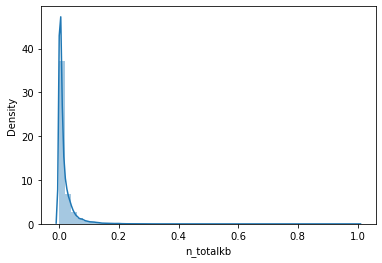

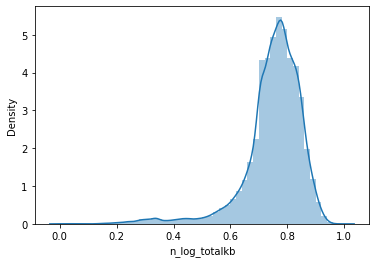

                                    line_id      total_kb  n_totalkb  \
0      000027f8-7b65-407a-a90e-619e16f7cd60  2.904393e+07   0.010279   
1      0000871b-a418-424b-b6f6-79cfc4db0a12  3.612444e+06   0.001278   
2      00022391-6d4e-41bb-a0ca-2af25cec301d  1.100738e+07   0.003896   
3      00040e10-1cd1-434c-bf4f-3fd3cc6ecdf8  9.687519e+06   0.003428   
4      00044afe-35a4-4313-92ec-36618c83fb23  2.490053e+07   0.008812   
...                                     ...           ...        ...   
55113  fffc0209-3cec-4a77-be13-2fff03ede88a  5.773423e+06   0.002043   
55114  fffc2f64-85b9-4115-b782-52dbe497fdf6  1.395901e+07   0.004940   
55115  fffee791-298d-4a18-975b-ac3f64938790  1.558323e+08   0.055149   
55116  fffefbba-00b7-42b7-9125-4b86497e0b4f  4.291105e+07   0.015186   
55117  ffffad0a-7a92-43dd-b296-e9f4218630d8  1.973861e+06   0.000699   

       n_log_totalkb  
0           0.782062  
1           0.682826  
2           0.735870  
3           0.729789  
4           0.774734

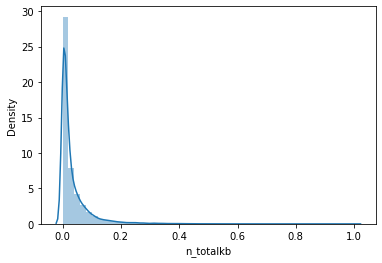

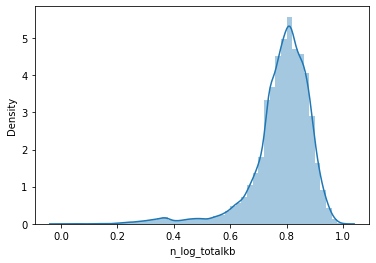

                                    line_id      total_kb  n_totalkb  \
0      00006596-10d3-4a05-b11e-112731675bf7  5.199555e+06   0.003635   
1      00047e17-7213-46d4-98aa-1e766d4674e9  2.088209e+06   0.001460   
2      0005ee18-7f2e-4867-abce-af569b2fddb4  2.238078e+06   0.001565   
3      000679de-2c4d-4ffb-bf20-b5822005818d  5.360719e+07   0.037479   
4      00068567-c0da-4dbe-99f7-93578dd28606  1.321596e+06   0.000924   
...                                     ...           ...        ...   
36643  fff82c89-99a7-4317-a626-093f256e00ed  4.830363e+06   0.003377   
36644  fffc5111-dbcd-45cb-81cd-31708e6e69ce  9.461096e+05   0.000661   
36645  fffcdd4b-a0df-4199-8200-fb7ce6c05d08  3.663590e+07   0.025614   
36646  ffff9e4d-5f70-4528-a583-ca58f6db0ae6  3.180588e+06   0.002224   
36647  ffffd3ec-fca9-4277-9a99-614d30e3529a  8.965322e+07   0.062681   

       n_log_totalkb  
0           0.733550  
1           0.690276  
2           0.693564  
3           0.844223  
4           0.668576

In [4]:
def sum_network_in_function(df):
    sum_network_in_function=df.groupby(['line_id'])['total_kb'].sum()#按照id分类加和
    sum_network_in_function = sum_network_in_function.to_frame().reset_index()#重命名
    print(sum_network_in_function)
    
    max_kb=sum_network_in_function['total_kb'].max()
    min_kb=sum_network_in_function['total_kb'].min()
    sum_network_in_function['n_totalkb']=(sum_network_in_function['total_kb']-min_kb)/(max_kb-min_kb)

    sns.distplot(sum_network_in_function['n_totalkb'])
    plt.show()
    
    sum_network_in_function=sum_network_in_function[sum_network_in_function['total_kb']>0]
    max_log_kb = np.log(sum_network_in_function [ 'total_kb' ].max ())
    min_log_kb = np.log(sum_network_in_function [ 'total_kb' ].min ())
    sum_network_in_function [ 'n_log_totalkb' ] = ((np.log(sum_network_in_function [ 'total_kb' ]) - min_log_kb) / (max_log_kb - min_log_kb))
    
    sns.distplot(sum_network_in_function [ 'n_log_totalkb' ])
    plt.show()
    return sum_network_in_function

sum_network=sum_network_in_function(network_usage_domestic.copy())
print(sum_network)

sum_network_eval=sum_network_in_function(network_usage_domestic_eval)
print(sum_network_eval)


# total revenue

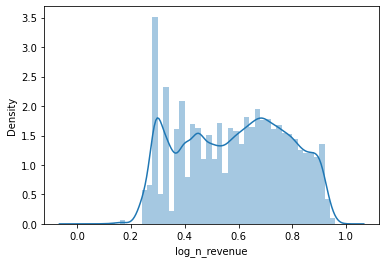

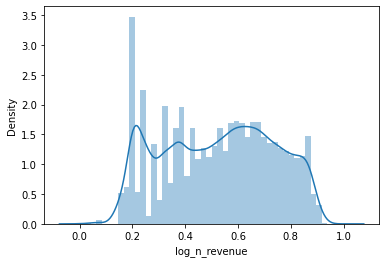

In [5]:
def total_revenue_in_function(redemptions):
    total_revenue=redemptions.groupby(['line_id'])['gross_revenue'].sum()
    total_revenue = total_revenue.to_frame().reset_index()
    total_revenue=total_revenue[total_revenue['gross_revenue']>0]
    log_max_revenue=np.log(total_revenue['gross_revenue'].max())
    log_min_revenue=np.log(total_revenue['gross_revenue'].min())
    total_revenue['log_n_revenue']=(np.log(total_revenue['gross_revenue'])-log_min_revenue)/(log_max_revenue-log_min_revenue)
    sns.distplot(total_revenue['log_n_revenue'])
    plt.show()
    return total_revenue

total_revenue=total_revenue_in_function(redemptions)
total_revenue_eval=total_revenue_in_function(redemptions_eval)

# voice call

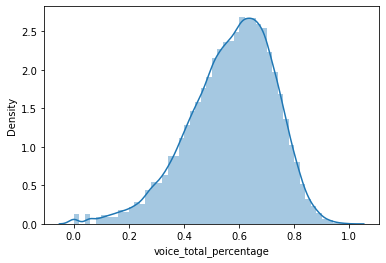

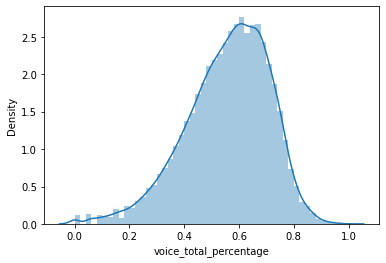

In [6]:
def agg_voice_in_function(network_usage_domestic):
    agg_voice_in=network_usage_domestic.groupby(['line_id'])['voice_min_in'].sum().reset_index()
    agg_voice_out=network_usage_domestic.groupby(['line_id'])['voice_min_out'].sum().reset_index()
    agg_voice=pd.merge(agg_voice_out,agg_voice_in.loc[:,['line_id','voice_min_in']],on='line_id',how='outer')
    agg_voice['voice_total']=agg_voice['voice_min_out']+agg_voice['voice_min_in']
    agg_voice=agg_voice[agg_voice['voice_total']>0]
    vocie_max=np.log(agg_voice['voice_total'].max())
    voice_min=np.log(agg_voice['voice_total'].min())
    agg_voice['voice_total_percentage']=(np.log(agg_voice['voice_total'])-voice_min)/(vocie_max-voice_min)

    sns.distplot(agg_voice['voice_total_percentage'])
    plt.show()
    return agg_voice

agg_voice=agg_voice_in_function(network_usage_domestic)
agg_voice_eval=agg_voice_in_function(network_usage_domestic_eval)

# using date

0        0.873447
1        0.485292
2        0.870066
3        0.492347
4        0.601729
           ...   
55863    0.877951
55864    0.472556
55865    0.171106
55866    0.627181
55867    0.760457
Name: n_using_date, Length: 55868, dtype: float64


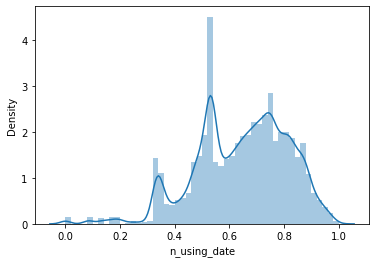

0        0.539972
1        0.615096
2        0.479798
3        0.702727
4        0.364935
           ...   
37150    0.731912
37151    0.557708
37152    0.871077
37153    0.818830
37154    0.828338
Name: n_using_date, Length: 37155, dtype: float64


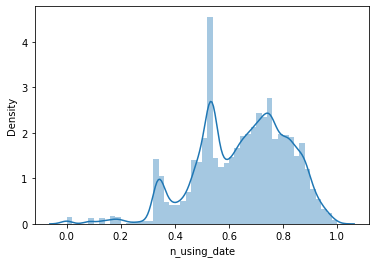

In [7]:
def using_date_in_function(customer_info,upgrades):
    using_date=pd.merge(customer_info,upgrades.loc[:,['line_id','date_observed']],on='line_id',how='outer')
    using_date['first_activation_date']=using_date['first_activation_date'].fillna('2021/3/09')

    using_date['start_Date']=pd.to_datetime(using_date['first_activation_date'])
    using_date['end_date']=pd.to_datetime(using_date['date_observed'])
    using_date['using_date']=using_date['end_date']-using_date['start_Date']
    date_max=np.log((using_date['using_date'].max()).days)
    date_min=np.log((using_date['using_date'].min()).days)
    using_date['using_date_temp']=using_date['using_date'].dt.days
    using_date['n_using_date']=(np.log(using_date['using_date_temp'])-date_min)/(date_max-date_min)
    
    print(using_date['n_using_date'])

    sns.distplot(using_date['n_using_date'])
    plt.show()
    return using_date
    
using_date=using_date_in_function(customer_info,upgrades)
using_date_eval=using_date_in_function(customer_info_eval,upgrades_eval)

In [8]:
def enrollment_in_function(customer_info,lrp_enrollment):
    enrollment=pd.merge(customer_info.loc[:,['line_id']],lrp_enrollment.loc[:,['line_id','lrp_enrolled']],on='line_id',how='outer')
    enrollment['lrp_enrolled']=enrollment['lrp_enrolled'].fillna('N')
    enrollment['lrp_enrolled']=enrollment['lrp_enrolled'].replace({'Y':1,'N':0})
    print(enrollment)
    return enrollment

enrollment=enrollment_in_function(customer_info,lrp_enrollment)
enrollment_eval=enrollment_in_function(customer_info_eval,lrp_enrollment_eval)

                                    line_id  lrp_enrolled
0      e1b8b731-f3c6-4a8a-b09c-f3556888c868             0
1      51c1e947-f8a4-4a9c-94f8-45f52198f329             1
2      ba024df0-cfa9-4c88-ac48-87e0c055f650             1
3      21be69d6-5ebf-4449-bc0a-828ac5ea5d8a             0
4      1f385125-deed-424b-9a29-13b1c6dc3dda             0
...                                     ...           ...
55871  8052a7e7-2c09-4873-a583-f9dd7f02e27b             0
55872  8eacf359-f96a-4749-92f1-ef500d0e064e             0
55873  76531942-f047-4f2c-b2d2-c986312bd723             0
55874  62ca5877-391e-47aa-8956-80dda4af35e9             1
55875  57222ddf-0320-4c82-b0de-93da52406721             0

[55876 rows x 2 columns]
                                    line_id  lrp_enrolled
0      938a4776-70c3-44f0-bb48-b87aaa2e031c             1
1      f227696c-a624-4795-bfb5-e929340f2e61             1
2      e5b6cd93-4463-464e-9f74-b40485d74e89             0
3      bed41e10-47ff-413c-b602-73938499812f   

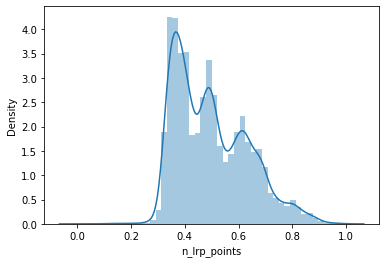

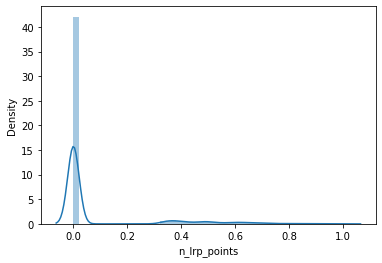

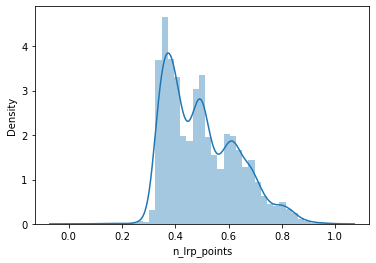

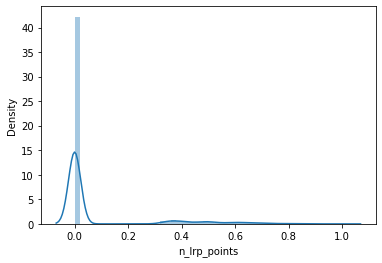

In [9]:
def lrp_points_in_funtion(customer_info,lrp_points):
    lrp_point_max=np.log(lrp_points['total_quantity'].max())
    lrp_point_min=np.log(lrp_points['total_quantity'].min())
    lrp_points['n_lrp_points']=(np.log(lrp_points['total_quantity'])-lrp_point_min)/(lrp_point_max-lrp_point_min)

    sns.distplot(lrp_points['n_lrp_points'])
    plt.show()
    
    all_customer_lrp=pd.merge(customer_info.loc[:,['line_id']],lrp_points.loc[:,['line_id','n_lrp_points']],on='line_id',how='outer')
    all_customer_lrp['n_lrp_points']=all_customer_lrp['n_lrp_points'].fillna(0)

    sns.distplot(all_customer_lrp['n_lrp_points'])
    plt.show()
    return all_customer_lrp
    
lrp_enroll=lrp_points_in_funtion(customer_info,lrp_points)
lrp_enroll_eval=lrp_points_in_funtion(customer_info_eval,lrp_points_eval)

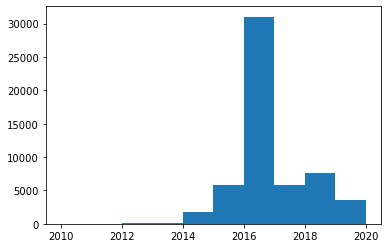

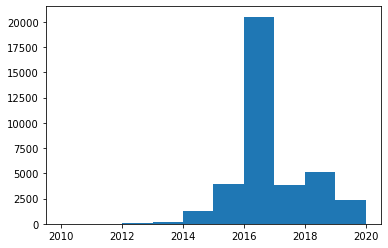

In [10]:
def phone_in_function(phone_info):
    group = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

    phone_info['year_released'].fillna(phone_info['year_released'].mode()[0], inplace=True)

    plt.hist(phone_info['year_released'],group)
    plt.show()

    phone_info['mark_of_year']=phone_info['year_released']-2010
    max_year_mark=phone_info['mark_of_year'].max()
    min_year_mark=phone_info['mark_of_year'].min()
    phone_info['n_mark_of_year']=1-(phone_info['mark_of_year']-min_year_mark)/(max_year_mark-min_year_mark)
    
    return phone_info

phone_info_score=phone_in_function(phone_info)
phone_info_score_eval=phone_in_function(phone_info_eval)

In [11]:
print(phone_info_score)

                                    line_id cpu_cores  expandable_storage  \
0      8803884c-38df-4243-a522-891c2117790c         4                 0.0   
1      75b2d7a7-c4f8-4cf2-af32-ab25b5dffacc         8                 1.0   
2      7f10447b-7ce6-4297-9011-8273b11354ee       2+4                 0.0   
3      50579bcb-6413-4dfb-865d-f11d3adad1fe       NaN                 NaN   
4      c56e177c-0514-493c-bbc2-7e2c9308aa73       NaN                 NaN   
...                                     ...       ...                 ...   
55863  16eb2028-712f-4bf0-90c3-8d2f0c6e823a       NaN                 NaN   
55864  12185c31-c7a6-427d-aa10-49c3519079d8       2+4                 0.0   
55865  015a1474-c479-483c-ad8e-5b38d8dbc193       NaN                 NaN   
55866  a7063837-e2c2-4e94-a358-0f71087d6fa1         4                 0.0   
55867  34f5ee6c-8a81-4160-aa40-a4d4436786e2       NaN                 NaN   

      gsma_device_type        gsma_model_name gsma_operating_system  \
0   

In [12]:
def customer_plan_in_function(customer_info):
    customer_plan=customer_info.loc[:,['line_id','carrier','plan_name']].drop_duplicates()
    customer_plan['carrier'].fillna(customer_info['carrier'].mode()[0], inplace=True)
    customer_plan['plan_name'].fillna(customer_info['plan_name'].mode()[0], inplace=True)
    customer_plan=pd.get_dummies(customer_info,columns=['carrier','plan_name'],drop_first=False)
    
    print(customer_plan)
    return customer_plan
    
customer_plan=customer_plan_in_function(customer_info)
customer_plan_eval=customer_plan_in_function(customer_info_eval)

                                    line_id first_activation_date  \
0      e1b8b731-f3c6-4a8a-b09c-f3556888c868            2017-12-12   
1      51c1e947-f8a4-4a9c-94f8-45f52198f329            2021-01-18   
2      ba024df0-cfa9-4c88-ac48-87e0c055f650            2018-01-16   
3      21be69d6-5ebf-4449-bc0a-828ac5ea5d8a            2021-01-18   
4      1f385125-deed-424b-9a29-13b1c6dc3dda            2020-10-31   
...                                     ...                   ...   
55863  8052a7e7-2c09-4873-a583-f9dd7f02e27b            2017-10-30   
55864  8eacf359-f96a-4749-92f1-ef500d0e064e            2021-01-26   
55865  76531942-f047-4f2c-b2d2-c986312bd723                   NaN   
55866  62ca5877-391e-47aa-8956-80dda4af35e9            2020-10-02   
55867  57222ddf-0320-4c82-b0de-93da52406721            2019-11-25   

      plan_subtype redemption_date  carrier_carrier 1  carrier_carrier 2  \
0              NaN             NaN                  1                  0   
1           [NULL] 

In [13]:
def merge_table1(upgrades,sum_network,total_revenue,agg_voice,using_date,lrp_enroll,customer_plan,enrollment,phone_info_score):
    temp_merge1=pd.merge(upgrades.loc[:,['line_id','upgrade']],sum_network.loc[:,['line_id','n_totalkb','total_kb']],on='line_id',how='outer')
    temp_merge1['n_totalkb']=temp_merge1['n_totalkb'].fillna(0)
    temp_merge1['total_kb']=temp_merge1['total_kb'].fillna(0)

    temp_merge2=pd.merge(temp_merge1,total_revenue.loc[:,['line_id','log_n_revenue']],on='line_id',how='outer')
    temp_merge2['log_n_revenue']=temp_merge2['log_n_revenue'].fillna(0)

    temp_merge3=pd.merge(temp_merge2,agg_voice.loc[:,['line_id','voice_total_percentage']],on='line_id',how='outer')
    temp_merge3['voice_total_percentage']=temp_merge3['voice_total_percentage'].fillna(0)

    temp_merge4=pd.merge(temp_merge3,using_date.loc[:,['line_id','n_using_date','using_date_temp']],on='line_id',how='outer')
    temp_merge4['n_using_date']=temp_merge4['n_using_date'].fillna(0)
    temp_merge4['using_date_temp']=temp_merge4['using_date_temp'].fillna(0)

    temp_merge5=pd.merge(temp_merge4,lrp_enroll.loc[:,['line_id','n_lrp_points']],on='line_id',how='outer')

    temp_merge6=pd.merge(temp_merge5,customer_plan,on='line_id',how='inner')

    temp_merge7=pd.merge(temp_merge6,enrollment,on='line_id',how='inner')

    merge_table=pd.merge(temp_merge7,phone_info_score.loc[:,['line_id','n_mark_of_year']],on='line_id',how='outer')
    
    return merge_table

def merge_table2(upgrades,sum_network,total_revenue,agg_voice,using_date,lrp_enroll,customer_plan,enrollment,phone_info_score):
    temp_merge1=pd.merge(upgrades.loc[:,['line_id']],sum_network.loc[:,['line_id','n_totalkb','total_kb']],on='line_id',how='outer')
    temp_merge1['n_totalkb']=temp_merge1['n_totalkb'].fillna(0)
    temp_merge1['total_kb']=temp_merge1['total_kb'].fillna(0)

    temp_merge2=pd.merge(temp_merge1,total_revenue.loc[:,['line_id','log_n_revenue']],on='line_id',how='outer')
    temp_merge2['log_n_revenue']=temp_merge2['log_n_revenue'].fillna(0)

    temp_merge3=pd.merge(temp_merge2,agg_voice.loc[:,['line_id','voice_total_percentage']],on='line_id',how='outer')
    temp_merge3['voice_total_percentage']=temp_merge3['voice_total_percentage'].fillna(0)

    temp_merge4=pd.merge(temp_merge3,using_date.loc[:,['line_id','n_using_date','using_date_temp']],on='line_id',how='outer')
    temp_merge4['n_using_date']=temp_merge4['n_using_date'].fillna(0)
    temp_merge4['using_date_temp']=temp_merge4['using_date_temp'].fillna(0)

    temp_merge5=pd.merge(temp_merge4,lrp_enroll.loc[:,['line_id','n_lrp_points']],on='line_id',how='outer')

    temp_merge6=pd.merge(temp_merge5,customer_plan,on='line_id',how='inner')

    temp_merge7=pd.merge(temp_merge6,enrollment,on='line_id',how='inner')

    merge_table=pd.merge(temp_merge7,phone_info_score.loc[:,['line_id','n_mark_of_year']],on='line_id',how='outer')
    
    return merge_table

dev_merge=merge_table1(upgrades,sum_network,total_revenue,agg_voice,using_date,lrp_enroll,customer_plan,enrollment,phone_info_score)
print(dev_merge)
eval_merge=merge_table2(upgrades_eval,sum_network_eval,total_revenue_eval,agg_voice_eval,using_date_eval,lrp_enroll_eval,customer_plan_eval,enrollment_eval,phone_info_score_eval)

print(eval_merge)

                                    line_id upgrade     n_totalkb  \
0      f0b99d3b-32f7-4464-8fa8-87f27c9810a8     yes  1.829362e-02   
1      a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00     yes  3.348585e-02   
2      dd3a01a3-7baf-4605-9799-ce434328a20d      no  1.190556e-02   
3      5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc      no  3.757352e-03   
4      6437fcbd-02c4-4c52-b5b2-f7e535ecec47     yes  6.518052e-02   
...                                     ...     ...           ...   
55871  f89b108a-f453-4419-a4dc-5bf8e1cd1f1a      no  6.865812e-03   
55872  b703f1d4-57ba-48b6-8adf-46d7aba6a406      no  8.173729e-02   
55873  e3b2212c-906e-4a8f-8307-6b88fc64d7a0      no  1.856515e-02   
55874  828df9bf-279c-47c3-96c2-92177a50b8fd      no  3.099736e-08   
55875  a0a14009-da02-4989-bdce-bc66146e0324     yes  4.996043e-02   

           total_kb  log_n_revenue  voice_total_percentage  n_using_date  \
0      5.169149e+07       0.843826                0.384978      0.846400   
1      9.461952e+07

0        0.770820
1        0.810170
2        0.825297
3        0.835100
4        0.894846
           ...   
55871    0.802304
55872    0.849845
55873    0.895166
55874    0.325646
55875    0.832807
Name: n_data_year, Length: 54803, dtype: float64


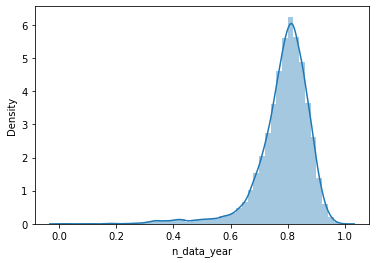

0        0.761200
1        0.767914
2        0.772670
4        0.688778
6        0.746985
           ...   
37151    0.822720
37152    0.632985
37153    0.800493
37154    0.721417
37155    0.830526
Name: n_data_year, Length: 36489, dtype: float64


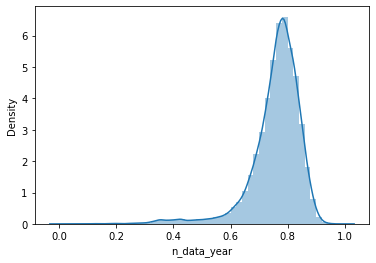

                                    line_id upgrade     n_totalkb  \
0      f0b99d3b-32f7-4464-8fa8-87f27c9810a8     yes  1.829362e-02   
1      a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00     yes  3.348585e-02   
2      dd3a01a3-7baf-4605-9799-ce434328a20d      no  1.190556e-02   
3      5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc      no  3.757352e-03   
4      6437fcbd-02c4-4c52-b5b2-f7e535ecec47     yes  6.518052e-02   
...                                     ...     ...           ...   
55871  f89b108a-f453-4419-a4dc-5bf8e1cd1f1a      no  6.865812e-03   
55872  b703f1d4-57ba-48b6-8adf-46d7aba6a406      no  8.173729e-02   
55873  e3b2212c-906e-4a8f-8307-6b88fc64d7a0      no  1.856515e-02   
55874  828df9bf-279c-47c3-96c2-92177a50b8fd      no  3.099736e-08   
55875  a0a14009-da02-4989-bdce-bc66146e0324     yes  4.996043e-02   

           total_kb  log_n_revenue  voice_total_percentage  n_using_date  \
0      5.169149e+07       0.843826                0.384978      0.846400   
1      9.461952e+07

In [14]:
def adv_merge(merge_table):
    merge_table['data_use_per_year']=merge_table['total_kb']/merge_table['using_date_temp']
    merge_table['data_use_per_year']=merge_table['data_use_per_year'].fillna(0)

    merge_table=merge_table[merge_table['data_use_per_year']>0]
    max_data_year=np.log(merge_table['data_use_per_year'].max())
    min_data_year=np.log(merge_table['data_use_per_year'].min())
    merge_table['n_data_year']=(np.log(merge_table['data_use_per_year'])-min_data_year)/(max_data_year-min_data_year)
    merge_table['n_data_year']=merge_table['n_data_year'].fillna(0)
    
    print(merge_table['n_data_year'])
    sns.distplot(merge_table['n_data_year'])
    plt.show()
    
    return merge_table

dev_merge1=adv_merge(dev_merge)
eval_merge1=adv_merge(eval_merge)
print(dev_merge1)
print(eval_merge1)


In [15]:
#x=merge_table.loc[:,['n_totalkb','voice_total_percentage','n_using_date','n_lrp_points','n_mark_of_year','log_n_revenue','n_data_year','carrier_carrier 2','carrier_carrier 3','plan_name_plan 1','plan_name_plan 2','plan_name_plan 3','plan_name_plan 4','lrp_enrolled']]
x=dev_merge1.loc[:,['n_totalkb','voice_total_percentage','n_using_date','n_lrp_points','n_mark_of_year','n_data_year','log_n_revenue',
                    'carrier_carrier 1','carrier_carrier 2','carrier_carrier 3','plan_name_plan 1','plan_name_plan 2','plan_name_plan 3','plan_name_plan 4','lrp_enrolled']]
dev_merge1['yesorno']=dev_merge1['upgrade'].replace({'yes':1,'no':0})
y=dev_merge1.loc[:,['yesorno']]

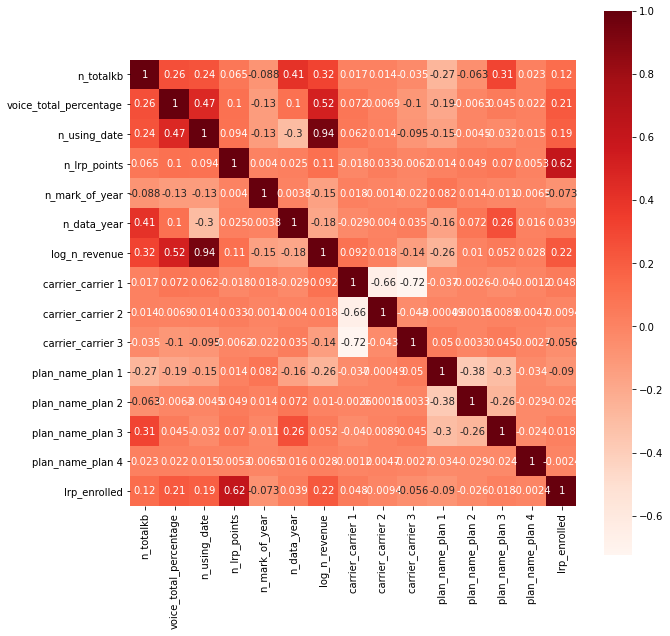

In [16]:
fig, ax = plt.subplots ( figsize=(10, 10) )
sns.heatmap(x.corr(),annot=True, vmax=1, square=True, cmap="Reds")

plt.show()

In [17]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
list_operation=[SVC(),LogisticRegression(),AdaBoostClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),MLPClassifier()]
name_operation=["SVC","LogisticRegression","AdaBoostClassifier","RandomForestClassifier","DecisionTreeClassifier","MLPClassifier"]
for i in range(6):
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,dev_merge1['upgrade'],test_size=0.5)
    operation=list_operation[i]
    operation.fit(Xtrain,Ytrain)
    accuracy=operation.score(Xtest,Ytest)
    f1=f1_score(Ytest, operation.predict(Xtest), labels=['yes','no'], pos_label='yes')
    print("%s accuracy is %.3f and f1_score is %.3f "%(name_operation[i],accuracy,f1))
    # scores=cross_val_score(estimator=operation,X=Xtrain,y=Ytrain,cv=10,n_jobs=1)
    # print("CV Accuracy Scores: %s\n" % scores)

SVC accuracy is 0.842 and f1_score is 0.672 
LogisticRegression accuracy is 0.838 and f1_score is 0.662 
AdaBoostClassifier accuracy is 0.847 and f1_score is 0.684 
RandomForestClassifier accuracy is 0.874 and f1_score is 0.750 
DecisionTreeClassifier accuracy is 0.825 and f1_score is 0.674 
MLPClassifier accuracy is 0.845 and f1_score is 0.723 


In [18]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,dev_merge1['upgrade'],test_size=0.5)
test_model=RandomForestClassifier()
operation.fit(Xtrain,Ytrain)
scores=cross_val_score(estimator=operation,X=Xtrain,y=Ytrain,cv=10,n_jobs=1)
print("CV Accuracy Scores: %s\n" % scores)

CV Accuracy Scores: [0.85114922 0.85839416 0.8379562  0.85       0.84890511 0.84562044
 0.85875912 0.85182482 0.86824818 0.85547445]



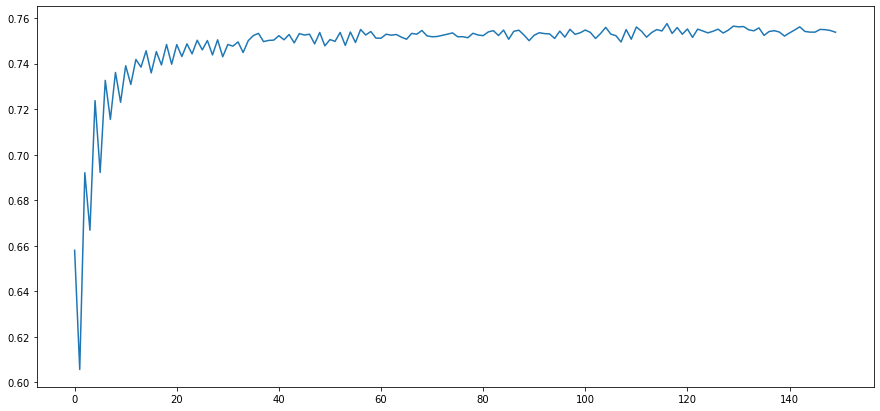

In [19]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,dev_merge1['upgrade'],test_size=0.5)
score= []
for i in range(150):
    rfc = RandomForestClassifier(n_estimators= i+1)
    rfc.fit(Xtrain,Ytrain)
    f1=f1_score(Ytest, rfc.predict(Xtest), labels=['yes','no'], pos_label='yes')
    score.append(f1)
plt.figure(figsize=(15,7))
plt.plot(score)

In [20]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.5)
from sklearn.model_selection import GridSearchCV
param_test1 = {"n_estimators":range(100,201,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,
                        scoring='f1',cv=10)
gsearch1.fit(Xtrain,Ytrain)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(100, 201, 10)}, scoring='f1')

In [21]:
print(gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

{'n_estimators': 200}
best accuracy:0.750194


In [22]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.5)
param_test2 = {"max_features":range(1,15,1)}
gsearch2 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),param_grid = param_test2,scoring='f1',cv=10)
gsearch2.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_features': range(1, 15)}, scoring='f1')

In [23]:
print(gsearch2.best_params_)
print("best accuracy:%f" % gsearch2.best_score_)

{'max_features': 5}
best accuracy:0.750865


In [24]:
test_model2=RandomForestClassifier(n_estimators=200,max_features=4)
test_model2.fit(Xtrain,Ytrain)
accuracy=test_model2.score(Xtest,Ytest)
print(accuracy)
f1=f1_score(Ytest, test_model2.predict(Xtest), labels=['yes','no'], pos_label='yes')
print("accuracy is %.3f and f1_score is %.3f "%(accuracy,f1))

0.8749361360484637


ValueError: pos_label='yes' is not a valid label: array([0, 1])

The highest f1 score appears when we the RandomForestClassifier model.

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,dev_merge1['upgrade'],test_size=0.5)
test_model=RandomForestClassifier(n_estimators=200,max_features=4)
test_model.fit(Xtrain,Ytrain)

x_predict=eval_merge1.loc[:,['n_totalkb','voice_total_percentage','n_using_date','n_lrp_points','n_mark_of_year','n_data_year','log_n_revenue',
                    'carrier_carrier 1','carrier_carrier 2','carrier_carrier 3','plan_name_plan 1','plan_name_plan 2','plan_name_plan 3','plan_name_plan 4','lrp_enrolled']]

eval_merge1['upgrades']=test_model.predict(x_predict)
eval_merge1['upgrade']=eval_merge1['upgrades'].replace({'yes':1,'no':0})
sns.countplot(x="upgrade", data=eval_merge1)
submission=eval_merge1.loc[:,['line_id','upgrade']]

root_folder='2021-04-25.csv'
submission.to_csv(root_folder,index=False)

In [ ]:
test=pd.read_csv('2021-04-25.csv')
print(test)

import os

#获取当前目录绝对路径
dir_path = os.path.dirname(os.path.abspath('2021-04-25.csv'))
print('当前目录绝对路径:',dir_path)